<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [247]:
from google.colab import drive
drive.mount('/content/drve')

Drive already mounted at /content/drve; to attempt to forcibly remount, call drive.mount("/content/drve", force_remount=True).


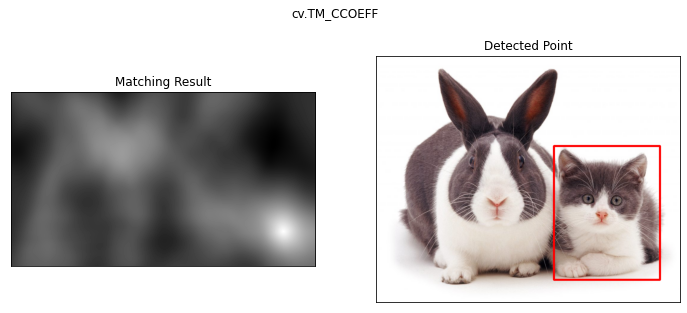

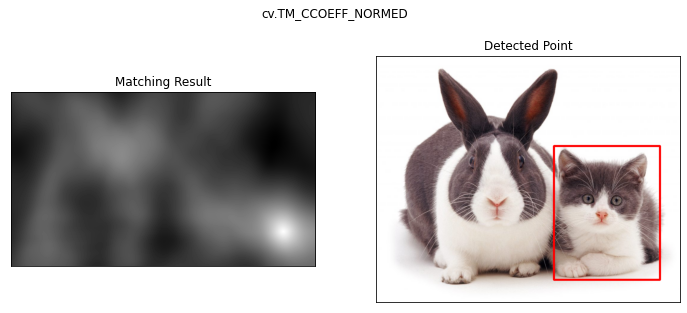

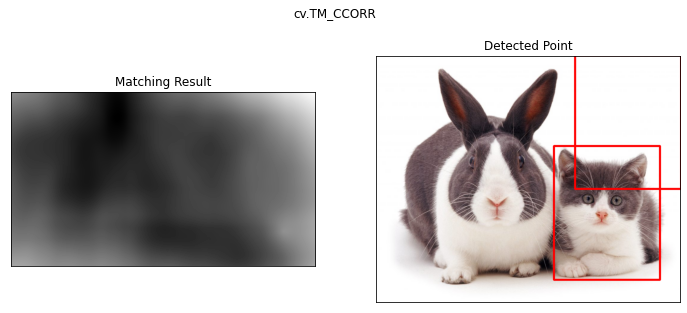

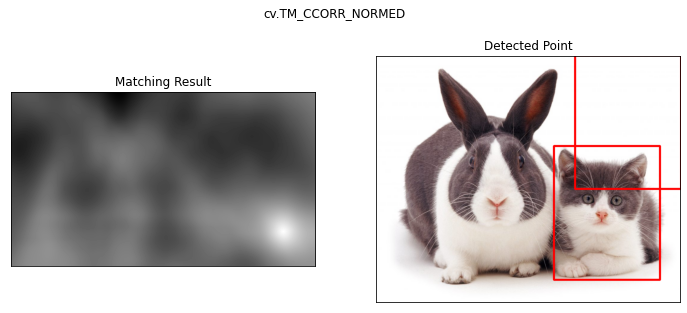

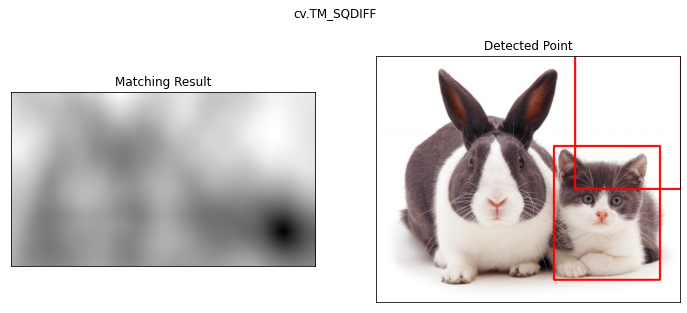

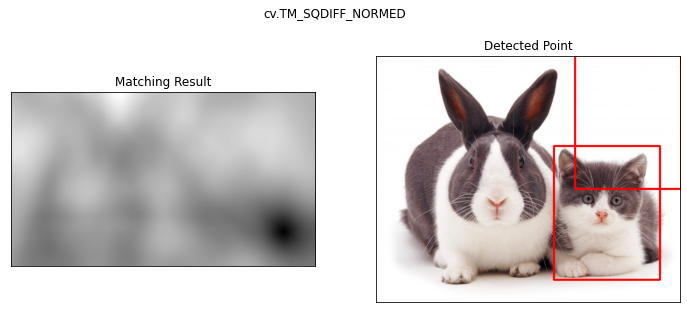

In [248]:
from __future__ import print_function
import sys
img = cv.imread('/content/drve/MyDrive/PCVK/Images/cats_and_bunnies.jpg')
img2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/drve/MyDrive/PCVK/Images/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
for meth in methods:
    # img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img2,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, (255,0,0), 5)
    plt.figure(figsize=(12,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img)
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

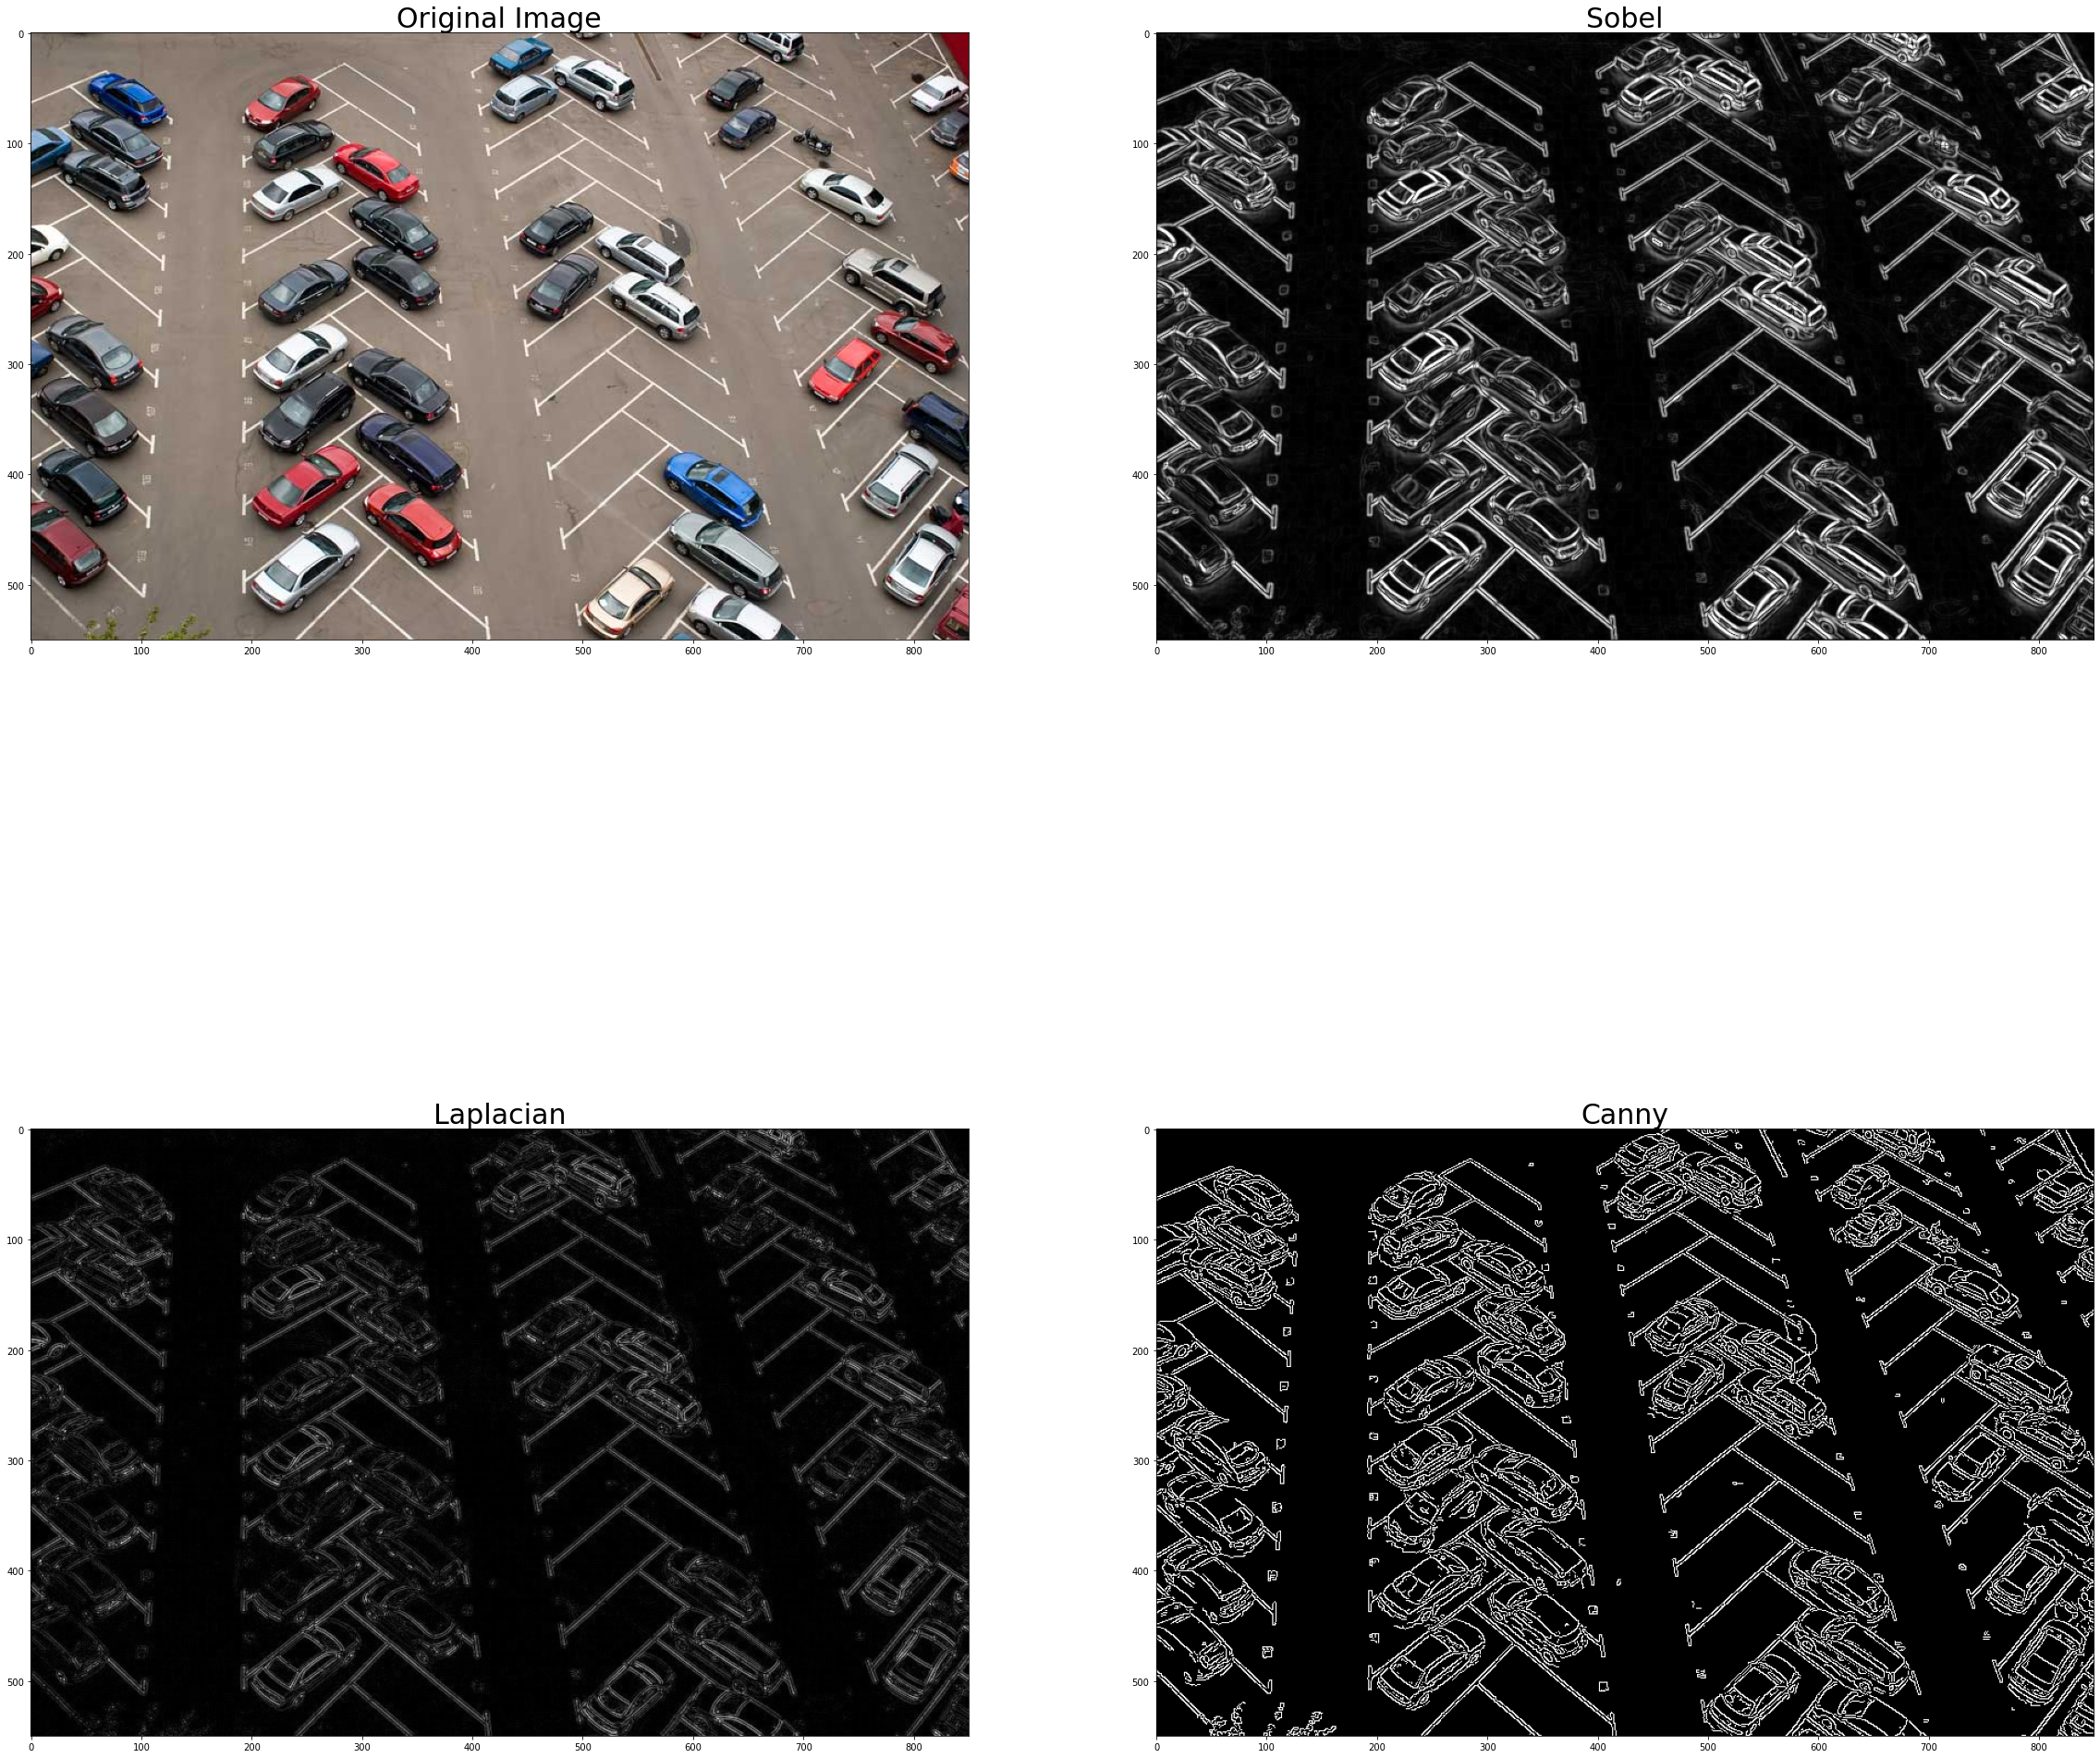

In [ ]:
img = cv.imread('/content/drve/MyDrive/PCVK/Images/parking-lot-cars.jpg')

# color transformations
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
blur = cv.GaussianBlur(img,(3,3),0)
gray = cv.cvtColor(blur, cv.COLOR_RGB2GRAY)

# Canny
canny = cv.Canny(img,100,200)

#Sobel
grad_x = cv.Sobel(gray, cv.CV_16S, 1, 0, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(gray, cv.CV_16S, 0, 1, ksize=3, scale=1, delta=0, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)
sobel = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

# Laplacian
laplacian = cv.Laplacian(gray,cv.CV_16S,3)
laplacian = cv.convertScaleAbs(laplacian)

# Displays
fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title('Original Image', fontdict = {'fontsize' : 30})
fig.set_figwidth(40)
fig.set_figheight(40)
axs[0, 0].imshow(img)
axs[0, 1].set_title('Sobel', fontdict = {'fontsize' : 30})
fig.set_figwidth(40)
fig.set_figheight(40)
axs[0, 1].imshow(sobel, cmap='gray')
axs[1, 0].set_title('Laplacian', fontdict = {'fontsize' : 30})
fig.set_figwidth(40)
fig.set_figheight(40)
axs[1, 0].imshow(laplacian, cmap='gray')
axs[1, 1].set_title('Canny', fontdict = {'fontsize' : 30})
fig.set_figwidth(40)
fig.set_figheight(40)
axs[1, 1].imshow(canny, cmap='gray')


# plt.subplot(1,1,1),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(2,2,2),plt.imshow(sobel,cmap = 'gray')
# plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(3,3,3),plt.imshow(laplacian,cmap = 'gray')
# plt.title('Laplacian Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(4,4,4),plt.imshow(canny,cmap = 'gray')
# plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Shi Tomasi'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

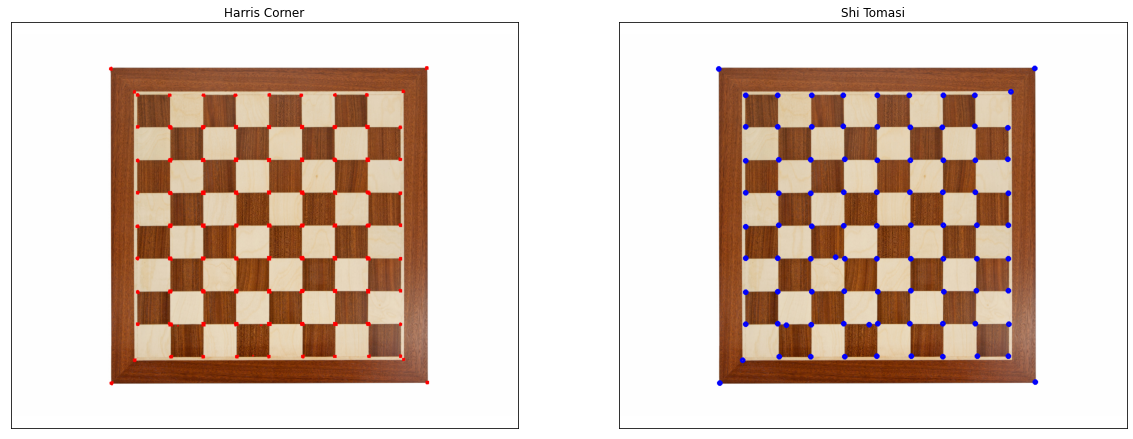

In [ ]:
# file access and color transformations
filename = '/content/drve/MyDrive/PCVK/Images/chess-board.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_harris = img
img_shi = cv.imread(filename)
img_shi = cv.cvtColor(img_shi, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Harris Corner
harris_gray = np.float32(gray)
dst = cv.cornerHarris(harris_gray,5,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img_harris[dst>0.01*dst.max()]=[255,0,0]

# Shi-Tomasi
gray_shi = gray
corners = cv.goodFeaturesToTrack(gray_shi,500,0.075,10, useHarrisDetector = False)
corners = np.float32(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img_shi,(x,y),3,(0, 0, 255),3)

# Displays
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img_harris)
plt.title('Harris Corner'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_shi)
plt.title('Shi Tomasi'), plt.xticks([]), plt.yticks([])


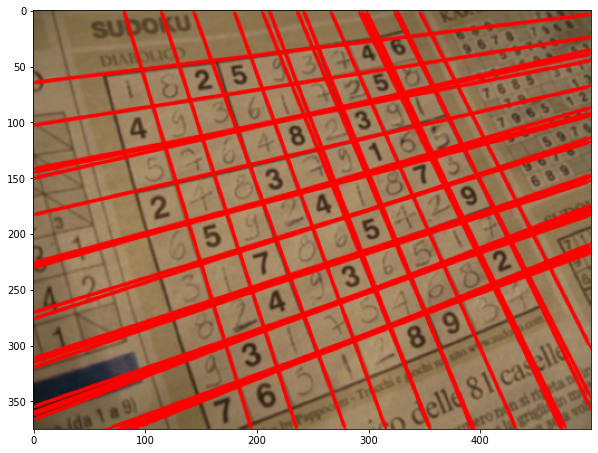

In [271]:
import math
img = cv.imread('/content/drve/MyDrive/PCVK/Images/sudoku.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)

lines = cv.HoughLines(edges, 1, np.pi/180, 165, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv.line(img, pt1, pt2, (255,0,0), 2, cv.LINE_AA)

# linesP = cv.HoughLines(edges, 1, np.pi/180,50, None, 50, 10)

# if linesP is not None:
#   for i in range(0, len(linesP)):
#     l = linesP[i][0]
#     cv.line(cdstP, (l[0], l[1], l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
plt.figure(figsize=(10,10))
plt.imshow(img)

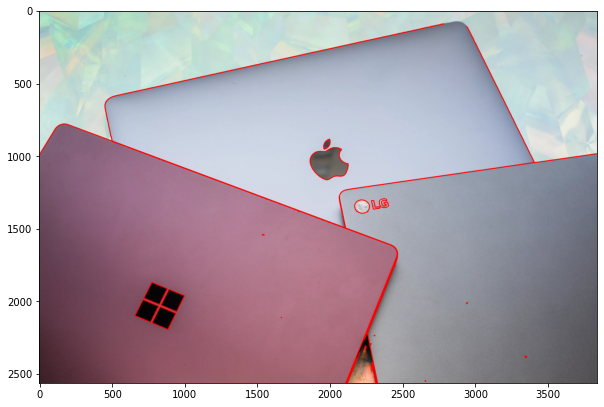

In [273]:
img = cv.imread('/content/drve/MyDrive/PCVK/Images/laptop.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# img=cv.cvtColor(img, cv.COLOR_BGR2RGB)
# imgray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
# ret, thresh = cv.threshold(imgray, 180, 200, cv.THRESH_BINARY_INV)
# blur=cv.GaussianBlur(thresh,(5,5),0)
# contours, hierarchy = cv.findContours(blur, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
# draw = cv.drawContours(img, contours, -1, (255,0,0), 10)
# plt.figure(figsize=(10,10))
# plt.imshow(img)
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# use canny edge detection
canny = cv.Canny(img_gray, 30, 200)

# Contour detection
contours, hierarchy = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (255,0,0), 5)

# Display
plt.figure(figsize=(10,10))
plt.imshow(img)